<a href="https://colab.research.google.com/github/Alextrev2/Series-de-Tiempo_ATR_A01284775/blob/main/Tipo_de_cambio_Ev_ATR_A01284775.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tecnológico de Monterrey

SERIES DE TIEMPO

GPO 102

Alejandro Treviño Ramírez A01284775

Lic. en Finanzas

Primer Periodo

16 de marzo del 2023

Introducción

¿Qué es una serie de tiempo? 

Una serie e tiempo es una secuencia de datos que podemos ver a lo largo del tiempo, esto con el principal objetivo de pronósticar el comportamiento de una variable, esto por medio de diferentes modelos.


¿Qué enfoque se usa para realizar el pronóstico? 

El enfoque es estocástico.


¿Qué se necesita para pronosticar en ese enfoque? 

Primero que nada se necesitan conocer los datos histórícos de una serie de tiempo. tambien se necesita determinar que modelo estadístico estaremos utilizando para realizar el pronóstico. Por último, en algunos casos podemos utilizar un método de evaluación como la prueba de hípotesis, para dterminar si se acepta o no el comportamiento de la variable.


¿Qué es diferenciar una serie? 

Es la diferencia entre los valores de una serie de tiempo durante el paso de tiempo. Con el objetico de convertir una serie en estacionaria.


¿El problema con el pronóstico de la serie?

El problema con el prónostico es que tiende a tomar la tendencia que se ve de los datos pasados. Tambien en el pronóstico despues de cierto tiempo puede llegar a calcular los mismo valores.

Tipo de Cambio

¿Qué es el tipo de cambio? ¿qué es el tipo de cambio spot y forward? 

Es el valor de una moneda con respecto a otra, se podría decir que es el precio de una de las diferentes divisas con respecto a otras.

¿Qué es el tipo de cambio spot y forward? 

El tipo de cambio sport se refiere al precio actual de las divisas, es decir el precio en el que puedes comprar otra divisa en este momento. En cuanto al tipo de cambio fix, se refiere a una tasa del tipo de cambio y se utiliza para acordar un precio para movimientos futuros


¿Cuál es el tipo de cambio fix?

En este tipo de cambio existe la intervención de un banco, el banco central, de manera que se establece un tipo de cambio fijo, esto con el bjetivo de que no haya variabilidad en precio de su moneda.


¿Cómo afecta financieramente a las empresas el tipo de cambio?

El tipo de cambio afecta cuando las empresas tienen proveedores, accionistas, o incluso presencia en otros países. Por ejemplo si nos vamos a una empresa que importa o exporta, tiene que tener en cuenta el tipo de cambio para poder calcular su rentabilidad. También si una persona quiere invertir en una empresa extranjera, debe de realizar un analísis y pronóstico del tipo de cambio, ya que su inversión se vera impactada hacia bien o hacia mal. Por ´ltimo, si la empresa se financia con otra moneda, por ejemplo dolares, el costo d su deuda se ve afectada por el valor de la moneda.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
tipo_de_cambio= pd.read_csv("/content/drive/MyDrive/4to Semestre/St/tareaa.csv")

In [ ]:
tipo_de_cambio

,Date,Tipo de cambio,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2021-09-07,19.888100,NaN,NaN,NaN,NaN,NaN
1,2021-09-08,19.927799,NaN,NaN,NaN,NaN,NaN
2,2021-09-09,19.927500,NaN,NaN,NaN,NaN,NaN
3,2021-09-10,19.921600,NaN,NaN,NaN,NaN,NaN
4,2021-09-13,19.865499,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
386,2023-03-01,18.300940,NaN,NaN,NaN,NaN,NaN
387,2023-03-02,18.115971,NaN,NaN,NaN,NaN,NaN
388,2023-03-03,18.105301,NaN,NaN,NaN,NaN,NaN
389,2023-03-06,17.978001,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tipo_de_cambio['Date'] = pd.to_datetime(tipo_de_cambio['Date'], format='%d/%m/%y')

In [ ]:
tipo_de_cambio= tipo_de_cambio.set_index('Date')

In [ ]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

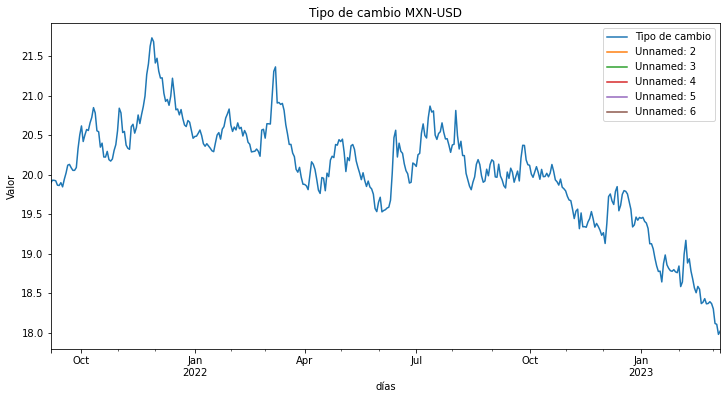

In [ ]:
# comenzamos graficando la serie
# titulo y nombre a ejes
tipo_de_cambio.plot()
plt.title('Tipo de cambio MXN-USD')
plt.xlabel('días')
plt.ylabel('Valor')
plt.show()

In [ ]:
## vamos a verificar que la serie sea estacionaria
result_adf = adfuller(tipo_de_cambio['Tipo de cambio'])
print('p-value: %.2f' % result_adf[1])

p-value: 0.87


No estacionario


In [ ]:
# diferenciar serie
tipo_de_cambio['Tipo de cambio diff'] = tipo_de_cambio['Tipo de cambio'].diff()

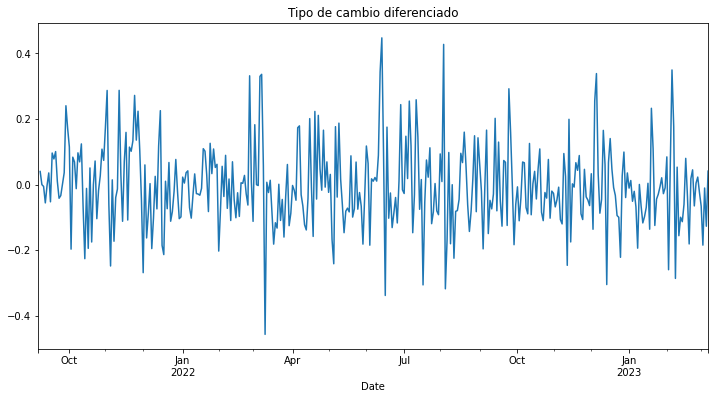

In [ ]:
# graficamos esta nueva serie
tipo_de_cambio['Tipo de cambio diff'].plot()
plt.title('Tipo de cambio diferenciado')
plt.show()

Esta prueba de raíces si es unitaria

In [ ]:
tipo_de_cambio.index

DatetimeIndex(['2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10',
               '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16',
               '2021-09-17', '2021-09-20',
               ...
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-27',
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-06', '2023-03-07'],
              dtype='datetime64[ns]', name='Date', length=391, freq=None)

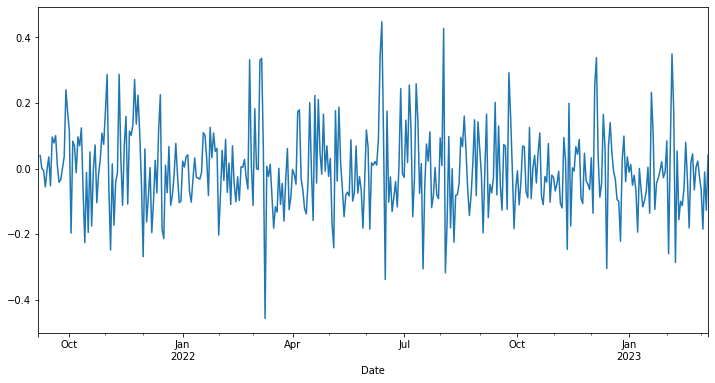

In [ ]:
tipo_de_cambio['Tipo de cambio diff'].plot();

Función de autocorrelacíon (ACF)

Función de autocorrelacíon parcial (PACF)

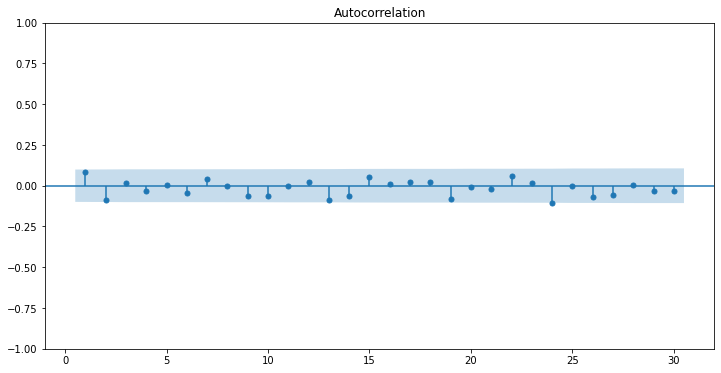

In [ ]:
#acf
plot_acf(tipo_de_cambio['Tipo de cambio diff'].dropna(), zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


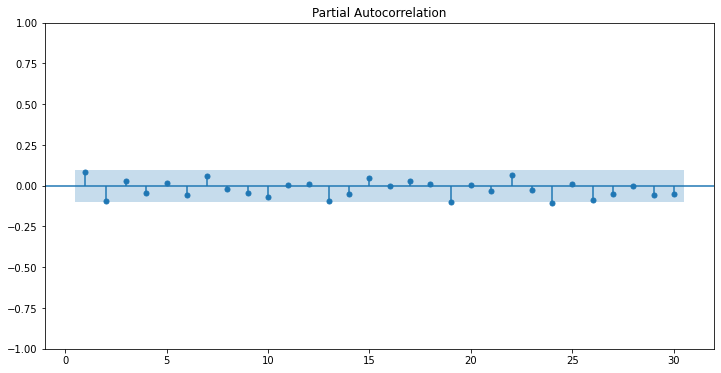

In [ ]:
# pacf
plot_pacf(tipo_de_cambio['Tipo de cambio diff'].dropna(), zero=False, lags=30);

In [ ]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipo_de_cambio['Tipo de cambio diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 0
AR: 1, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, f

AR: 1, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 1, MA: 4
AR: 2, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 4
AR: 3, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0  -507.937615 -500.005322
   1  -509.169645 -497.271204
   2  -510.724857 -494.860270
   3  -509.064358 -489.233624
   4  -507.994021 -484.197141
1  0  -508.574965 -496.676525
   1  -512.234763 -496.370176
   2  -510.315320 -490.484586
   3  -508.507295 -484.710415
   4  -506.747245 -478.984217
2  0  -509.968689 -494.104102
   1  -510.308090 -490.477356
   2  -511.142073 -487.345192
   3  -508.121277 -480.358250
   4  -504.740296 -473.011122
3  0  -508.356746 -488.526013
   1  -508.509746 -484.712865
   2  -509.113492 -481.350465
   3  -506.830088 -475.100914
   4  -502.758976 -467.063656
4  0  -507.171999 -483.375118
   1  -506.723748 -478.960721
   2  -505.907182 -474.178008
   3  -504.224018 -468.528698
   4  -503.623479 -463.962012

In [ ]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
1  1  -512.234763 -496.370176
2  2  -511.142073 -487.345192
0  2  -510.724857 -494.860270
1  2  -510.315320 -490.484586
2  1  -510.308090 -490.477356
   0  -509.968689 -494.104102
0  1  -509.169645 -497.271204
3  2  -509.113492 -481.350465
0  3  -509.064358 -489.233624
1  0  -508.574965 -496.676525
3  1  -508.509746 -484.712865
1  3  -508.507295 -484.710415
3  0  -508.356746 -488.526013
2  3  -508.121277 -480.358250
0  4  -507.994021 -484.197141
   0  -507.937615 -500.005322
4  0  -507.171999 -483.375118
3  3  -506.830088 -475.100914
1  4  -506.747245 -478.984217
4  1  -506.723748 -478.960721
   2  -505.907182 -474.178008
2  4  -504.740296 -473.011122
4  3  -504.224018 -468.528698
   4  -503.623479 -463.962012
3  4  -502.758976 -467.063656

In [ ]:
##realizamos pronóstico
tipo_de_cambio['Tipo de cambio diff pronosticada'] = resultado.predict()

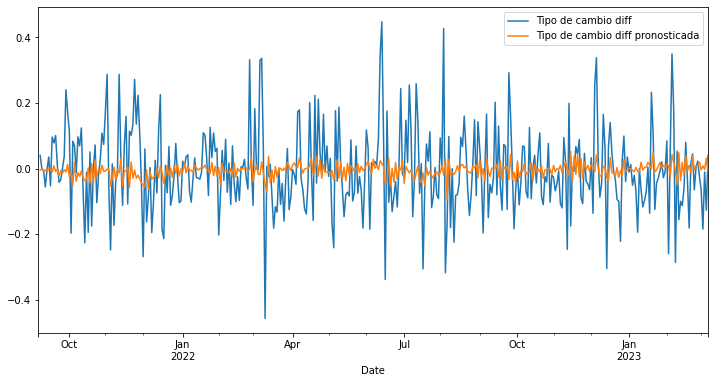

In [ ]:
tipo_de_cambio[['Tipo de cambio diff', 'Tipo de cambio diff pronosticada']].plot();

In [ ]:
modelo2 = ARIMA(tipo_de_cambio['Tipo de cambio'], order=(1, 1, 1)) ##AR(0,1)
resultado2 = modelo2.fit() #lo calcula
print(resultado2.summary()) #lo muestra

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Tipo de cambio   No. Observations:                  391
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 259.865
Date:                Fri, 10 Mar 2023   AIC                           -513.730
Time:                        17:38:05   BIC                           -501.832
Sample:                    09-07-2021   HQIC                          -509.014
                         - 03-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6805      0.165     -4.124      0.000      -1.004      -0.357
ma.L1          0.7886      0.148      5.343      0.000       0.499       1.078
sigma2         0.0154      0.001     17.248      0.0

In [ ]:
##realizamos pronóstico
tipo_de_cambio['Tipo de cambio pronosticada'] = resultado2.predict()

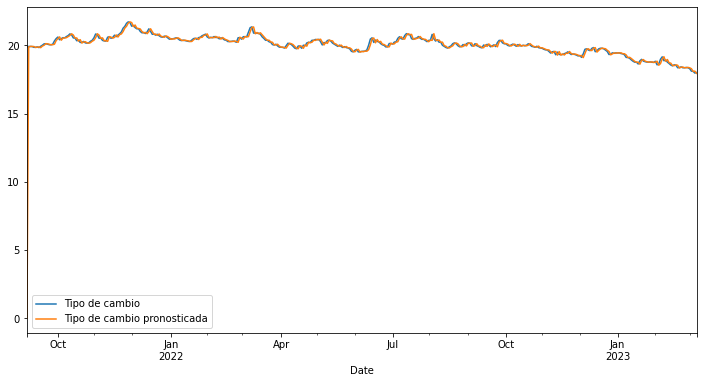

In [ ]:
tipo_de_cambio[['Tipo de cambio', 'Tipo de cambio pronosticada']].plot();

In [ ]:
tipo_de_cambio.iloc[0]["Tipo de cambio pronosticada"] = tipo_de_cambio.iloc[0]["Tipo de cambio"]

In [ ]:
tipo_de_cambio.tail()

,Tipo de cambio,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Tipo de cambio diff,Tipo de cambio diff pronosticada,Tipo de cambio pronosticada
Date,,,,,,,,,
2023-03-01,18.300940,NaN,NaN,NaN,NaN,NaN,-0.065959,-0.004323,18.362448
2023-03-02,18.115971,NaN,NaN,NaN,NaN,NaN,-0.184969,0.007986,18.297319
2023-03-03,18.105301,NaN,NaN,NaN,NaN,NaN,-0.010670,-0.002831,18.098828
2023-03-06,17.978001,NaN,NaN,NaN,NaN,NaN,-0.127300,0.031700,18.117667
2023-03-07,18.018860,NaN,NaN,NaN,NaN,NaN,0.040859,-0.009497,17.954486


In [ ]:
resultado2.predict(262,265)

2022-09-08    20.130369
2022-09-09    19.966507
2022-09-12    19.940338
2022-09-13    19.845663
Freq: B, Name: predicted_mean, dtype: float64